In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read a comma-seperated values (csv) file into DataFrame

df = pd.read_csv("LivongoChallenge.csv")

In [3]:
df.head()

,member_id,diabetes_type,gender,date_utc,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
0,1.021330e+13,Type 2,Female,8/1/17,4,157.00000,2,1
1,1.021330e+13,Type 2,Female,8/2/17,4,152.61111,1,1
2,1.021330e+13,Type 2,Female,8/3/17,1,157.88235,1,0
3,1.021330e+13,Type 2,Female,8/4/17,2,162.47058,2,0
4,1.021330e+13,Type 2,Female,8/5/17,4,166.22223,2,1


In [4]:
df.describe()

,member_id,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
count,7.297700e+04,72977.000000,71799.000000,72977.000000,72977.000000
mean,5.298323e+12,3.858380,158.036572,1.538498,0.273113
std,4.582929e+12,2.628071,40.560806,1.670834,0.674958
min,1.022970e+12,0.000000,56.750000,0.000000,0.000000
25%,1.027170e+12,2.000000,128.126600,0.000000,0.000000
50%,1.029210e+12,3.000000,153.000000,1.000000,0.000000
75%,1.021550e+13,5.000000,179.835585,2.000000,0.000000
max,1.021810e+13,45.000000,354.000000,45.000000,12.000000


In [5]:
#To check if there are any null values in the features
df.isnull().sum()

member_id                 0
diabetes_type             0
gender                    0
date_utc                  0
bg_checks                 0
avg_bg_value           1178
count_hyper_reading       0
count_hypo_reading        0
dtype: int64

#### It can be seen that there are 1178 null values present in the feataure avg_bg_value

### Data Munging

#### Convert categorical variables to numerical variables

In [6]:
df["diabetes_type"].value_counts()

Type 2    39417
Type 1    33560
Name: diabetes_type, dtype: int64

In [7]:
df["diabetes_type"] = df.apply(lambda x: 1 if x['diabetes_type'] == 'Type 1' else 2, axis = 1)

In [8]:
df.describe()

,member_id,diabetes_type,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
count,7.297700e+04,72977.000000,72977.000000,71799.000000,72977.000000,72977.000000
mean,5.298323e+12,1.540129,3.858380,158.036572,1.538498,0.273113
std,4.582929e+12,0.498390,2.628071,40.560806,1.670834,0.674958
min,1.022970e+12,1.000000,0.000000,56.750000,0.000000,0.000000
25%,1.027170e+12,1.000000,2.000000,128.126600,0.000000,0.000000
50%,1.029210e+12,2.000000,3.000000,153.000000,1.000000,0.000000
75%,1.021550e+13,2.000000,5.000000,179.835585,2.000000,0.000000
max,1.021810e+13,2.000000,45.000000,354.000000,45.000000,12.000000


### Data Analysis

In [9]:
df['date'] = pd.to_datetime(df['date_utc'])

In [10]:
df['month'] = df.date.dt.strftime('%m')

In [11]:
df['year'] = df.date.dt.strftime('%y')

In [12]:
df['year'].unique()

array(['17', '18'], dtype=object)

In [13]:
df['month'].unique()

array(['08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06',
       '07'], dtype=object)

#### The data comprises of years 2017 and 2018

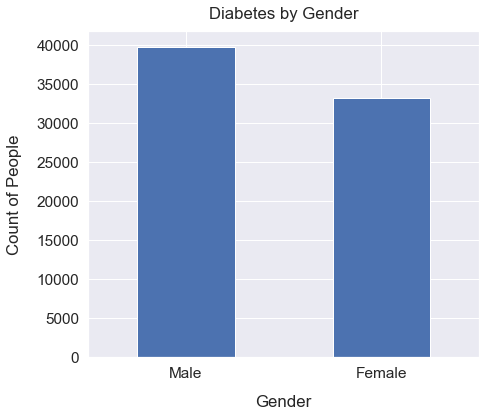

In [14]:
sns.set(font_scale=1.4)
df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Diabetes by Gender", y=1.02);

#### It can be inferred that gender has some effect on diabetes. It could be because women have less glucose level than men. (Source: Google)

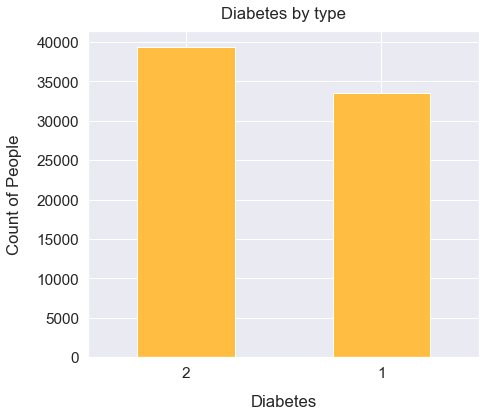

In [30]:
sns.set(font_scale=1.4)
df['diabetes_type'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color="#ffbe42")
plt.xlabel("Diabetes", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Diabetes by type", y=1.02);

#### A large number of members have type 2 diabetes as compared to type 1 diabetes. 

In [16]:
Diab_month = df.groupby(['month'])['avg_bg_value'].mean()
Diab_month.columns = ['avg_bg_value', 'month']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


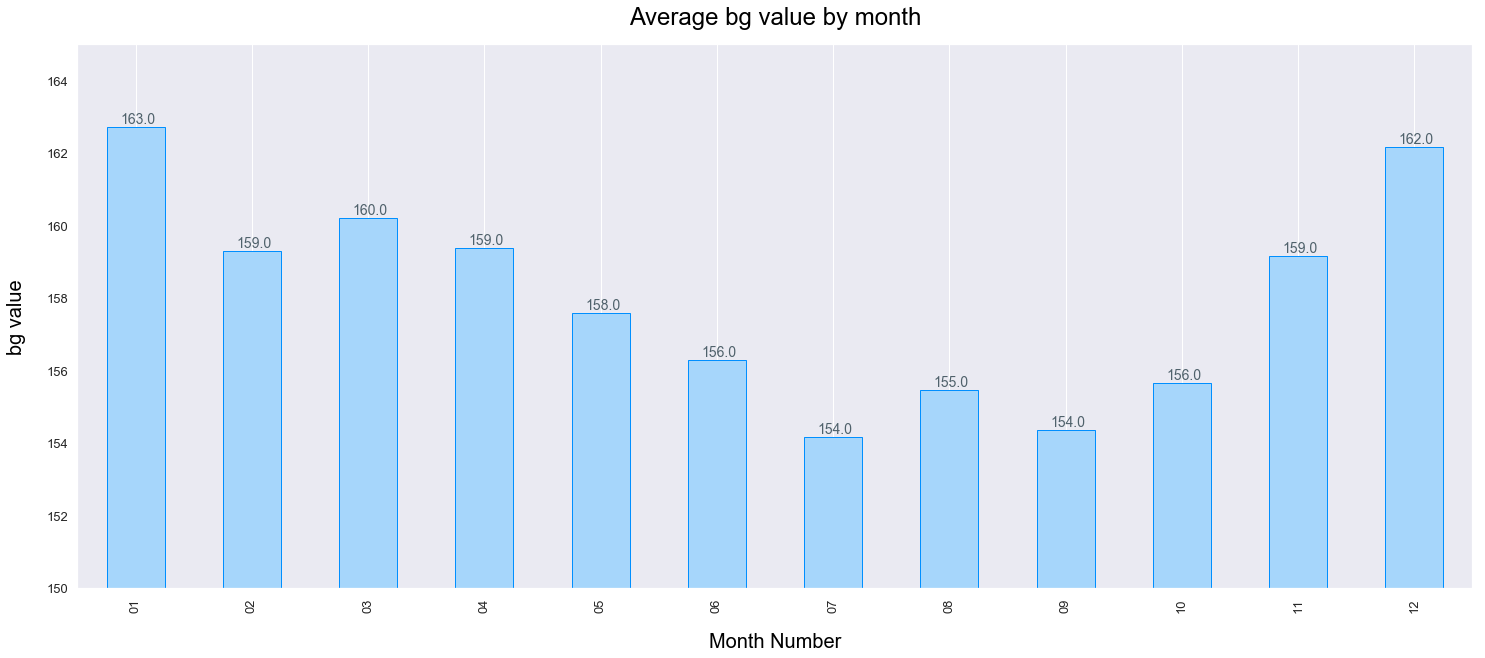

In [17]:
ax = Diab_month.plot.bar(colors="#A6D6FB", figsize=(25,10), fontsize=13, edgecolor='#008FFF')
for i in ax.patches:
    ax.annotate(np.round(i.get_height()), (i.get_x()+i.get_width()/2, i.get_height()),
         ha='center', va='center', color='#4F616B',fontsize =14,
         xytext=(2,8), textcoords='offset points')
ax.yaxis.grid()
ax.set_title('Average bg value by month', fontsize=24, color='black', pad=20)
plt.ylabel('bg value',fontsize=20, color='black')
plt.xlabel('Month Number',fontsize=20, color='black')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
plt.ylim((150,165))
plt.show()

#### The bar chart above indicates that members showed higher blood glucose levels on a monthly average. This can be used to monitor monthly average per member and reasons for the fluctuations.

#### The hike we see in January to December months could be because of Christmas/New Year celebrations.

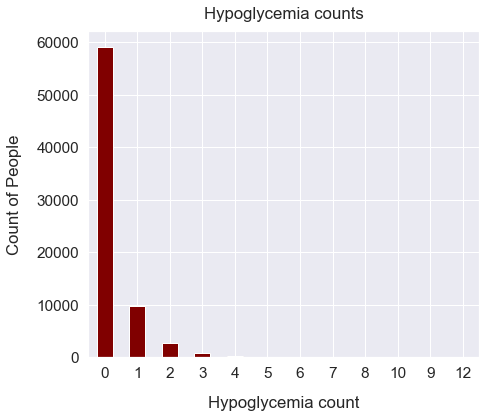

In [24]:
sns.set(font_scale=1.4)
df['count_hypo_reading'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color = '#800000')
plt.xlabel("Hypoglycemia count", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Hypoglycemia counts", y=1.02);

#### The above graph shows hypoglycemia counts for all the people. It can be obseved that most of the diabetic people do not have hypoglycemia. Only 10000 people have counted hypoglycemia once.
##### We can filter it to show only type-1 or type-2 diabetic people using groupby function.

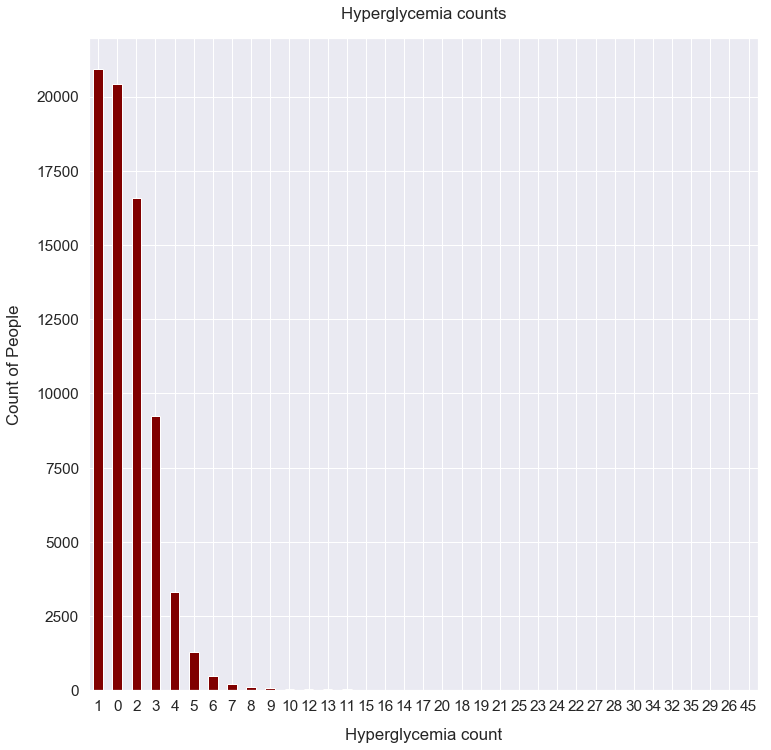

In [25]:
sns.set(font_scale=1.4)
df['count_hyper_reading'].value_counts().plot(kind='bar', figsize=(12, 12), rot=0, color="#800000")
plt.xlabel("Hyperglycemia count", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Hyperglycemia counts", y=1.02);

#### From the above graph we can see that a majority portion of diabetic people have hyperglycemia counts.